## K-Means
This notebook will start by covering how K-Means works, how to use K-Means clustering in Python, common metric to evaluate how good the clustering is, and some strengths and weaknesses of K-Means. 

### What is K-Means Clustering

K-means clustering is a popular centroid-based clustering algorithm. In k-means clustering, k refers to the number of user specified clusters.

Here is roughly how K-Means works:
1. Start with k initial (random) points (centroids)
2. Assign each datapoint to a cluster by finding its "closest" centroid.
3. Update centroids. This is done by recalculating each centroid's location as the mean (center) of all the points assigned to its cluster. 
4. Repeat 2-4 until the centroids stop moving or until the points stop switching clusters.

\* There are a number of techniques for choosing initial points. `k-means++` algorithm which scikit-learn uses by default makes the intial centroids a bit more smartly selected. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling data
from sklearn.preprocessing import StandardScaler

# Dataset import
from sklearn.datasets import load_iris

# Model imports
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets

### Load Data
The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset.

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
y = df['target'].values
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Plot data to estimate correct number of clusters
Sometimes you know how many clusters you want. This could be to knowing that you want to segment customers or if you know you have three flower species like in the iris dataset. One thing I want to mention is that in the iris dataset, we have four features, but only can graph two at a time easily 

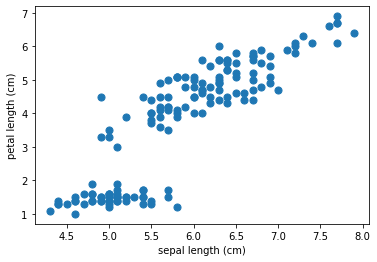

In [3]:
plt.scatter(df['sepal length (cm)'], df['petal length (cm)'], s=50);

# Add labels
plt.xlabel('sepal length (cm)');
plt.ylabel('petal length (cm)');

One thing I want to mention is that in the iris dataset, we have four features, but only can graph two at a time easily. We can try and graph multiple 2 dimensional plots like in the code below, but we can't get all of the features plotted at a time. 

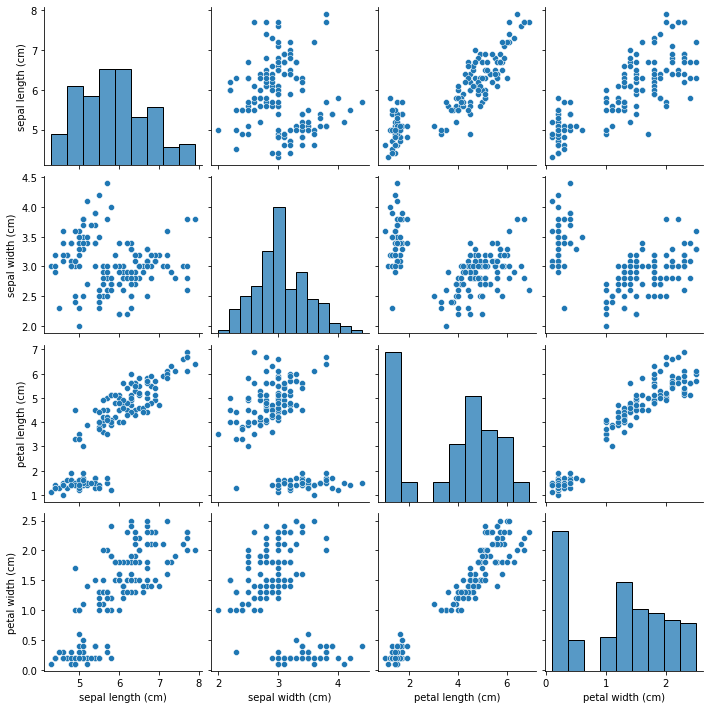

In [5]:
sns.pairplot(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]);

### Standardize Data
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. You can standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - mean) / std

The code below uses StandardScaler to accomplish this. 

<b>Preprocessing and scaling is an extremely important step when clustering in order to negative the huge affects outliers could have on clusters. </b>

In [6]:
X = df[['petal length (cm)','petal width (cm)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

![standardized](images/BeforeAfterStandard.png)
The image above shows standardization on a similar iris dataset (visualized as a pandas dataframe)

### Cluster the Data with K-Means 
K-Means with three clusters

In [7]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=1)

In [8]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

### Visually Evaluate the Clusters

In [9]:
colnames = ['petal length (cm)','petal width (cm)']

df = pd.DataFrame(X_scaled, columns = colnames)

In [10]:
X = pd.DataFrame(X_scaled, columns = colnames)

In [11]:
X

,petal length (cm),petal width (cm)
0,-1.340227,-1.315444
1,-1.340227,-1.315444
2,-1.397064,-1.315444
3,-1.283389,-1.315444
4,-1.340227,-1.315444
...,...,...
145,0.819596,1.448832
146,0.705921,0.922303
147,0.819596,1.053935
148,0.933271,1.448832


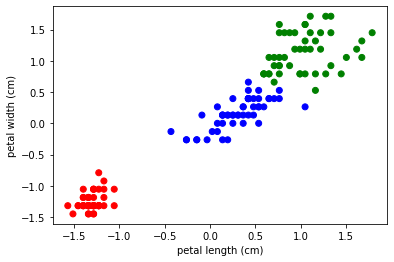

In [12]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=colormap[labels])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

### Also Plot in the Centroids

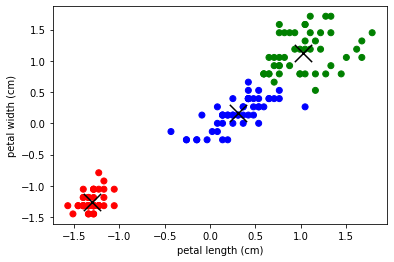

In [13]:
colormap = np.array(['r', 'g', 'b'])
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');

### Visually Evaluate the Clusters and Compare Species

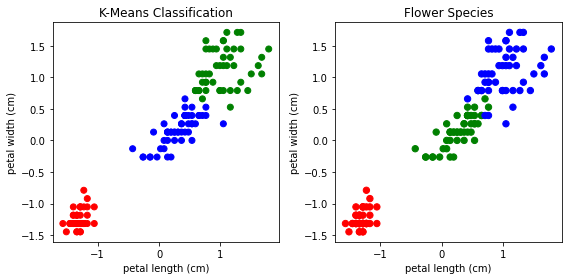

In [14]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=colormap[labels])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('K-Means Classification')
 
plt.subplot(1, 2, 2)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=colormap[y], s=40)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)');
plt.title('Flower Species')

plt.tight_layout()

They look pretty similar. Looks like KMeans picked up flower differences with only two features and not the labels. The colors are different in the two graphs simply because KMeans gives out a arbitrary cluster number and the iris dataset has an arbitrary number in the target column. 

### Compute the Silhouette Score for your Clusters

For clustering, we often use a metric called the **Silhouette Coefficient**. There are many other approaches, but this is a good place to start.

The Silhouette Coefficient gives a score for each sample individually. At a high level, it compares the point's cohesion to its cluster against its separation from the nearest other cluster. Ideally, you want the point to be very nearby other points in its own cluster and very far points in the nearest other cluster.

$$\frac {b - a} {max(a,b)}$$

- $a$ is the mean distance between a sample and all other points in the cluster.

- $b$ is the mean distance between a sample and all other points in the nearest cluster.

The coefficient ranges between 1 and -1. The larger the coefficient, the better the clustering.

To get a score for all clusters rather than for a particular point, we average over all points to judge the cluster algorithm.

In [15]:
metrics.silhouette_score(X, labels, metric='euclidean')

0.6741313114151009

### K-Means Potential Assumptions/Issues
(This section of the notebook is largely taken from [dashee87](https://github.com/dashee87))

A lot of times, people use an algorithm and assume it works under all circumstances, but that isn't the case. The gif below shows an ideal case of K-Means
![KMeansGIF](images/KMeansGIF.gif)

### Create Data
You can ignore how these datasets are created since they are just used for illustrative purposes. 

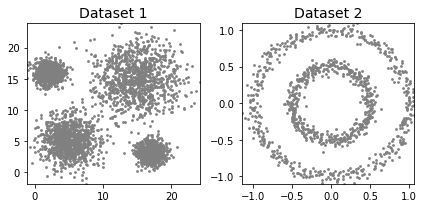

In [16]:
np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

#### Starting position of cluster centers

K-Means is sensitive to the starting position of the cluster centres, as each method converges to local optima, the frequency of which increase in higher dimensions. The gif below shows this issue.

![KMeansGIF](images/KMeansBadGIF.gif)

k-means clustering in scikit offers several extensions to the traditional approach. To prevent the alogrithm returning sub-optimal clustering, the kmeans method includes the `n_init` and `method` parameters. The former just reruns the algorithm with n different initialisations and returns the best output (measured by the within cluster sum of squares). By setting the latter to 'kmeans++' (the default), the initial centers are smartly selected (i.e. better than random). This has the additional benefit of decreasing runtime (less steps to reach convergence).
means_assumptions.html)

#### k is the correct number of clusters.
While the example below may make it seem obvious for some, choosing k is difficult. 

How do we choose k? 
Finding the correct k to use for k-means clustering is not a simple task.

We do not have a ground-truth we can use, so there isn't necessarily a "correct" number of clusters. However, we can find metrics that try to quantify the quality of our groupings.

Our application is also an important consideration. For example, during customer segmentation we want clusters that are large enough to be targetable by the marketing team. In that case, even if the most natural-looking clusters are small, we may try to group several of them together so that it makes financial sense to target those groups.

Common approaches include:
- Figuring out the correct number of clusters from previous experience.
- Elbow method
- If we're using clustering to improve performance on a supervised learning problem, then we can use our usual methods to test predictions.

In [ ]:
plt.figure(figsize=(4, 4))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("\"Incorrect\" Number of Blobs")

#### The data is isotropically distributed (circular/spherical distribution). Clusters are roughly the same size.

In the images below, K-Means performs quite well on ``Dataset1``, but fails miserably on ``Dataset2``. In fact, these two datasets illustrate the strenghts and weaknesses of k-means. The algorithm seeks and identifies globular (essentially spherical) clusters. If this assumption doesn't hold, the model output may be inadaquate (or just really bad). It doesn't end there; k-means can also underperform with clusters of different size and density.

In [ ]:
# implementing k-means clustering
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)
cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2)

#### The variance is the same for each variable.

In [ ]:
plt.figure(figsize=(4, 4))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)


# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)


plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

For all its faults, the enduring popularity of k-means (and related algorithms) stems from its versatility. Its average complexity is O(knT), where k,n and T are the number of clusters, samples and iterations, respectively. As such, it's considered one of the fastest clustering algorithms out there. And in the world of big data, this matters.